# Amazon Rekognition の画像分析を AWS SDK for Python でやってみる

AWS  SDK for Python を使って Amazon Rekognition の API をたたいて、画像を分析してみましょう。ノートブックを実行する前に、このノートブックと同じ場所にあらかじめ JPG か PNG ファイルをアップロードしておいてください。

In [1]:
import boto3
import json
from PIL import Image

# アップロードした画像名に書き換える
filename = 'cats.jpg'

with open(filename, 'rb') as image_file:
    image_bytes = image_file.read()

# Rekognition を使う準備
rekognition = boto3.client('rekognition', 'us-east-1')

response = rekognition.detect_labels(Image={'Bytes': image_bytes})
print(json.dumps(response, indent=2))

{
  "Labels": [
    {
      "Name": "Kitten",
      "Confidence": 98.82942962646484,
      "Instances": [],
      "Parents": [
        {
          "Name": "Cat"
        },
        {
          "Name": "Pet"
        },
        {
          "Name": "Mammal"
        },
        {
          "Name": "Animal"
        }
      ]
    },
    {
      "Name": "Cat",
      "Confidence": 98.82942962646484,
      "Instances": [
        {
          "BoundingBox": {
            "Width": 0.1382008194923401,
            "Height": 0.284536749124527,
            "Left": 0.25110477209091187,
            "Top": 0.3215147852897644
          },
          "Confidence": 93.85088348388672
        },
        {
          "BoundingBox": {
            "Width": 0.19683142006397247,
            "Height": 0.3206102252006531,
            "Left": 0.5763940811157227,
            "Top": 0.2979987859725952
          },
          "Confidence": 93.37085723876953
        },
        {
          "BoundingBox": {
            "Width":

API をたたいて取得した JSON をパースして、検出されたオブジェクトのバウンディングボックスの情報を取得し、画像に重畳表示します。

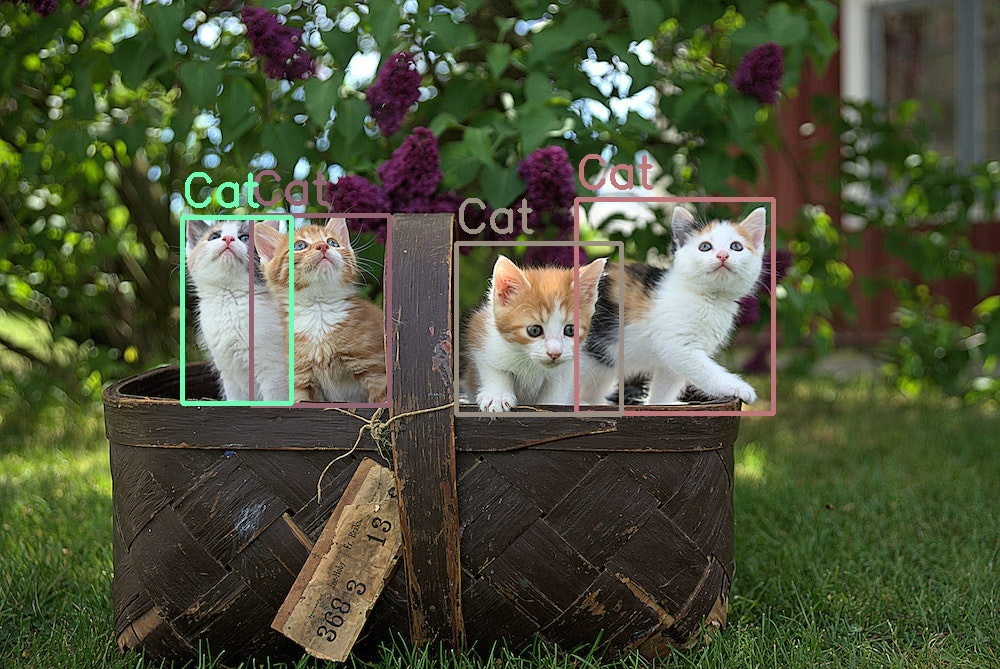

In [8]:
import cv2
import random

np_image = cv2.imread(filename)
height, width = np_image.shape[:2]

# 指定した Confidence value より大きい場合に枠を表示
for label in response['Labels']:

    for lb in label['Instances']:
        if lb['Confidence'] > 70:
            box = lb['BoundingBox']
            x = round(width * box['Left'])
            y = round(height * box['Top'])
            w = round(width * box['Width'])
            h = round(height * box['Height'])
            color =[random.uniform(100,255), random.uniform(100,255), random.uniform(100,255)]
            cv2.rectangle(np_image, (x, y), (x + w, y + h), color, 3)
            cv2.putText(np_image, label['Name'], (x, y - 12), cv2.FONT_HERSHEY_SIMPLEX, 1.5, color, 3)

outfile = './out.jpg'
cv2.imwrite(outfile, np_image)


from IPython.display import Image
Image(outfile)